In [19]:
import pandas as pd
import numpy as np
from plotnine import *
from pandas.api.types import CategoricalDtype

In [20]:
death_per_borough ='death_data/per_borough.csv'

In [21]:
df = pd.read_csv(death_per_borough)
df

,Date,Borough,Death
0,2020-03-22,Bronx,22.0
1,2020-03-22,Brooklyn,22.0
2,2020-03-22,Manhattan,17.0
3,2020-03-22,Queens,31.0
4,2020-03-22,Staten Island,7.0
...,...,...,...
79,2020-03-31,Total,1095.0
80,2020-04-01,Total,1373.0
81,2020-04-02,Total,1561.0
82,2020-04-03,Total,1866.0


In [22]:
p=(ggplot(df)         # defining what data to use
 + aes(x='Date',y='Death',group='Borough')    # defining what variable to use
 + geom_line(aes(color='Borough')) # defining the type of plot to use
 + geom_point(aes(color='Borough'))
 + scale_y_continuous(trans='log2')
 + labs(title='NYC Covid-19 Death per Borough', x='Date', y='Death')
 + theme(axis_text_x  = element_text(angle = 90, hjust = 1))
)

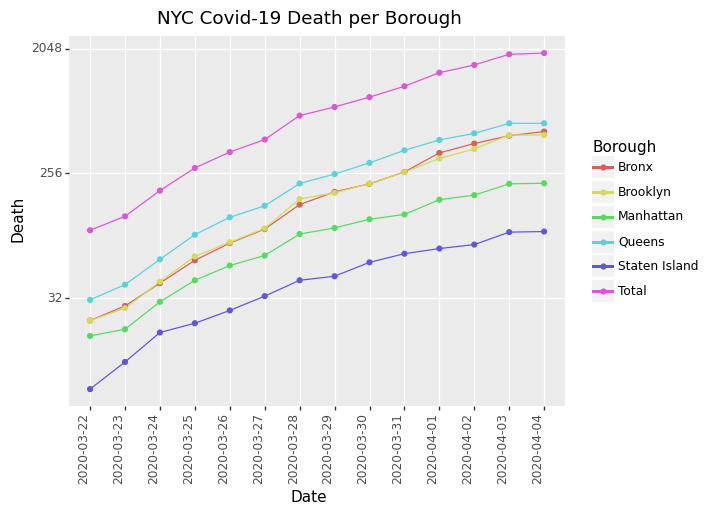

<ggplot: (7548632226)>

In [23]:
p

In [24]:
db=df.set_index(['Date','Borough']).unstack(0).T

In [25]:
db

Borough           Bronx  Brooklyn  Manhattan  Queens  Staten Island   Total
      Date                                                                 
Death 2020-03-22   22.0      22.0       17.0    31.0            7.0    99.0
      2020-03-23   28.0      27.0       19.0    40.0           11.0   125.0
      2020-03-24   41.0      42.0       30.0    61.0           18.0   192.0
      2020-03-25   60.0      64.0       43.0    92.0           21.0   280.0
      2020-03-26   80.0      81.0       55.0   123.0           26.0   365.0
      2020-03-27  101.0     102.0       65.0   149.0           33.0   450.0
      2020-03-28  152.0     167.0       93.0   216.0           43.0   671.0
      2020-03-29  188.0     185.0      103.0   253.0           46.0   775.0
      2020-03-30  215.0     216.0      119.0   305.0           58.0   913.0
      2020-03-31  262.0     261.0      129.0   376.0           67.0  1095.0
      2020-04-01  360.0     328.0      165.0   447.0           73.0  1373.0
      2020-04-02  421.0     385.0      178.0   499.0           78.0  1561.0
      2020-04-03  480.0     485.0      215.0   590.0           96.0  1866.0
      2020-04-04  514.0     486.0      217.0   590.0           97.0  1904.0

In [26]:
gradient=db.pct_change()

In [27]:
gradient.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14 entries, ('Death', '2020-03-22') to ('Death', '2020-04-04')
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bronx          13 non-null     float64
 1   Brooklyn       13 non-null     float64
 2   Manhattan      13 non-null     float64
 3   Queens         13 non-null     float64
 4   Staten Island  13 non-null     float64
 5   Total          13 non-null     float64
dtypes: float64(6)
memory usage: 909.0+ bytes


In [28]:
gradient

Borough              Bronx  Brooklyn  Manhattan    Queens  Staten Island  \
      Date                                                                 
Death 2020-03-22       NaN       NaN        NaN       NaN            NaN   
      2020-03-23  0.272727  0.227273   0.117647  0.290323       0.571429   
      2020-03-24  0.464286  0.555556   0.578947  0.525000       0.636364   
      2020-03-25  0.463415  0.523810   0.433333  0.508197       0.166667   
      2020-03-26  0.333333  0.265625   0.279070  0.336957       0.238095   
      2020-03-27  0.262500  0.259259   0.181818  0.211382       0.269231   
      2020-03-28  0.504950  0.637255   0.430769  0.449664       0.303030   
      2020-03-29  0.236842  0.107784   0.107527  0.171296       0.069767   
      2020-03-30  0.143617  0.167568   0.155340  0.205534       0.260870   
      2020-03-31  0.218605  0.208333   0.084034  0.232787       0.155172   
      2020-04-01  0.374046  0.256705   0.279070  0.188830       0.089552   
      2020-04-02  0.169444  0.173780   0.078788  0.116331       0.068493   
      2020-04-03  0.140143  0.259740   0.207865  0.182365       0.230769   
      2020-04-04  0.070833  0.002062   0.009302  0.000000       0.010417   

Borough              Total  
      Date                  
Death 2020-03-22       NaN  
      2020-03-23  0.262626  
      2020-03-24  0.536000  
      2020-03-25  0.458333  
      2020-03-26  0.303571  
      2020-03-27  0.232877  
      2020-03-28  0.491111  
      2020-03-29  0.154993  
      2020-03-30  0.178065  
      2020-03-31  0.199343  
      2020-04-01  0.253881  
      2020-04-02  0.136926  
      2020-04-03  0.195388  
      2020-04-04  0.020364

In [29]:
gradient.to_csv('death_data/per_borough_gradient.csv')

In [30]:
df=pd.read_csv('death_data/per_borough_gradient.csv')

In [31]:
df=df.drop(df.columns[[0]], axis=1) 

In [32]:
df

,Date,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Total
0,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-23,0.272727,0.227273,0.117647,0.290323,0.571429,0.262626
2,2020-03-24,0.464286,0.555556,0.578947,0.525000,0.636364,0.536000
3,2020-03-25,0.463415,0.523810,0.433333,0.508197,0.166667,0.458333
4,2020-03-26,0.333333,0.265625,0.279070,0.336957,0.238095,0.303571
5,2020-03-27,0.262500,0.259259,0.181818,0.211382,0.269231,0.232877
6,2020-03-28,0.504950,0.637255,0.430769,0.449664,0.303030,0.491111
7,2020-03-29,0.236842,0.107784,0.107527,0.171296,0.069767,0.154993
8,2020-03-30,0.143617,0.167568,0.155340,0.205534,0.260870,0.178065
9,2020-03-31,0.218605,0.208333,0.084034,0.232787,0.155172,0.199343
